# Comparing Signal Word Counts
- without punctuation
- not corrected

| Greetings | Thanks    | Please | Sorry | Okay | Slang    | Other |
|-----------|-----------|--------|-------|------|----------|-------|
| hey       | Thanks    | please | sorry | ok   | LOL      | ah    |
| hi        | Thank you | pls    | sry   | okay | sry      | help  |
| hello     |           | plz    |       |      | Cool     | yes   |
|           |           |        |       |      | Shitty   | no    |
|           |           |        |       |      | Tho      | but   |
|           |           |        |       |      | Nah      | now   |
|           |           |        |       |      | WTF      |       |
|           |           |        |       |      | Eh       |       |
|           |           |        |       |      | Bullshit |       |
|           |           |        |       |      | Nope     |       |
|           |           |        |       |      | yayyy    |       |
|           |           |        |       |      | nice     |       |


In [24]:
import pandas as pd
import sqlite3
import os
import numpy as np


from helpers.normalization import remove_punctuation, remove_punctuation_and_newlines
from helpers.statistical_tests import run_t_test_on_gender

db_path = "../../../giicg.db"
if not os.path.exists(db_path):
    raise FileNotFoundError(f"Database file does not exist: {db_path}")

conn = sqlite3.connect(db_path)
prompts = pd.read_sql("SELECT ep.*, u.age, u.work_exp_years FROM expanded_prompts ep JOIN users u ON ep.user_id = u.user_id", conn)
prompts['conversational'] = prompts['conversational'].apply(lambda x: remove_punctuation_and_newlines(x))
user_prompts = (
    prompts
    .fillna({'work_exp_years': 'None'})
    .groupby(['user_id', 'gender', 'age', 'work_exp_years'])['conversational']
    .apply(' '.join)
    .reset_index()    # Reset index to create a DataFrame
)
user_prompts

,user_id,gender,age,work_exp_years,conversational
0,6,Man (cisgender),19-25,3.0,parsing data from python iterator how it could...
1,8,Man (cisgender),19-25,1.0,I am working on the problem of reconstruc...
2,11,Woman (cisgender),26-30,1.0,Can you adapt the following code so that inste...
3,15,Man (cisgender),26-30,6.0,SETALLTABLES action is currently not fetching ...
4,16,Woman (cisgender),19-25,None,I want to use Dummy Hot encoding to replace th...
5,25,Man (cisgender),26-30,6.0,what is the best way to encode and compress a ...
6,28,Woman (cisgender),31-35,5.0,I have a pandas dataframe like this I want to...
7,29,Woman (cisgender),26-30,None,Now I want to bring judgement balancing into t...
8,30,Non-binary,26-30,None,as a NLP and LLM researcher I am recently down...
9,31,Man (cisgender),36-40,22.0,How can I make use of an ObservableHQDatabaseC...


In [25]:
from helpers.occurences import count_occurrences

words = ['hey', 'hi', 'hello', 'thanks', 'thank you', 'please', 'pls', 'plz', 'sorry', 'sry', 'okay', 'ok', 'lol', 'cool', 'shitty', 'tho', 'nah', 'wtf', 'eh', 'bullshit', 'nope', 'yayyy', 'nice', 'ah', 'help', 'yes', 'no', 'but', 'you', 'i', 'me', 'we', 'now', 'us', 'let']

user_prompts['n_words'] = user_prompts['conversational'].apply(lambda x: len(x.split()))

for word in words:
    user_prompts[word] = user_prompts.apply(
        lambda row: count_occurrences(row['conversational'], word) / row['n_words']
        if row['n_words'] > 0 else 0,
        axis=1
    )


user_prompts['greetings'] = user_prompts['hey'] + user_prompts['hi'] + user_prompts['hello']
user_prompts['thanks_grouped'] = user_prompts['thanks'] + user_prompts['thank you']
user_prompts['please_grouped'] = user_prompts['please'] + user_prompts['pls'] + user_prompts['plz']
user_prompts['yes_no_grouped'] = user_prompts['yes'] + user_prompts['no']
user_prompts['sorry'] = user_prompts['sorry'] + user_prompts['sry']
user_prompts['okay_grouped'] = user_prompts['okay'] + user_prompts['ok']

user_prompts['slang'] = user_prompts['lol'] + user_prompts['cool'] + user_prompts['shitty'] + user_prompts['tho'] + user_prompts['nah'] + user_prompts['wtf'] + user_prompts['eh'] + user_prompts['bullshit'] + user_prompts['nope'] + user_prompts['yayyy'] + user_prompts['nice']

user_prompts['interactions_grouped'] = user_prompts['yes_no_grouped'] + user_prompts['thanks_grouped'] + user_prompts['please_grouped'] + user_prompts['sorry'] + user_prompts['okay_grouped'] + user_prompts['greetings']

user_prompts

,user_id,gender,age,work_exp_years,conversational,n_words,hey,hi,hello,thanks,...,now,us,let,greetings,thanks_grouped,please_grouped,yes_no_grouped,okay_grouped,slang,interactions_grouped
0,6,Man (cisgender),19-25,3.0,parsing data from python iterator how it could...,192,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,8,Man (cisgender),19-25,1.0,I am working on the problem of reconstruc...,36,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,11,Woman (cisgender),26-30,1.0,Can you adapt the following code so that inste...,193,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,15,Man (cisgender),26-30,6.0,SETALLTABLES action is currently not fetching ...,36,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,16,Woman (cisgender),19-25,None,I want to use Dummy Hot encoding to replace th...,541,0.000000,0.000000,0.0,0.000000,...,0.001848,0.000000,0.000000,0.000000,0.000000,0.007394,0.005545,0.007394,0.000000,0.020333
5,25,Man (cisgender),26-30,6.0,what is the best way to encode and compress a ...,106,0.000000,0.000000,0.0,0.000000,...,0.009434,0.000000,0.000000,0.000000,0.000000,0.000000,0.009434,0.000000,0.000000,0.009434
6,28,Woman (cisgender),31-35,5.0,I have a pandas dataframe like this I want to...,562,0.000000,0.001779,0.0,0.007117,...,0.003559,0.001779,0.003559,0.001779,0.007117,0.007117,0.005338,0.001779,0.001779,0.023132
7,29,Woman (cisgender),26-30,None,Now I want to bring judgement balancing into t...,60,0.000000,0.000000,0.0,0.000000,...,0.016667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,30,Non-binary,26-30,None,as a NLP and LLM researcher I am recently down...,92,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.010870,0.000000,0.000000,0.000000,0.010870
9,31,Man (cisgender),36-40,22.0,How can I make use of an ObservableHQDatabaseC...,92,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Compare Genders (all users)
Including zeros: “does _use_ of this word differ between genders, generally?”

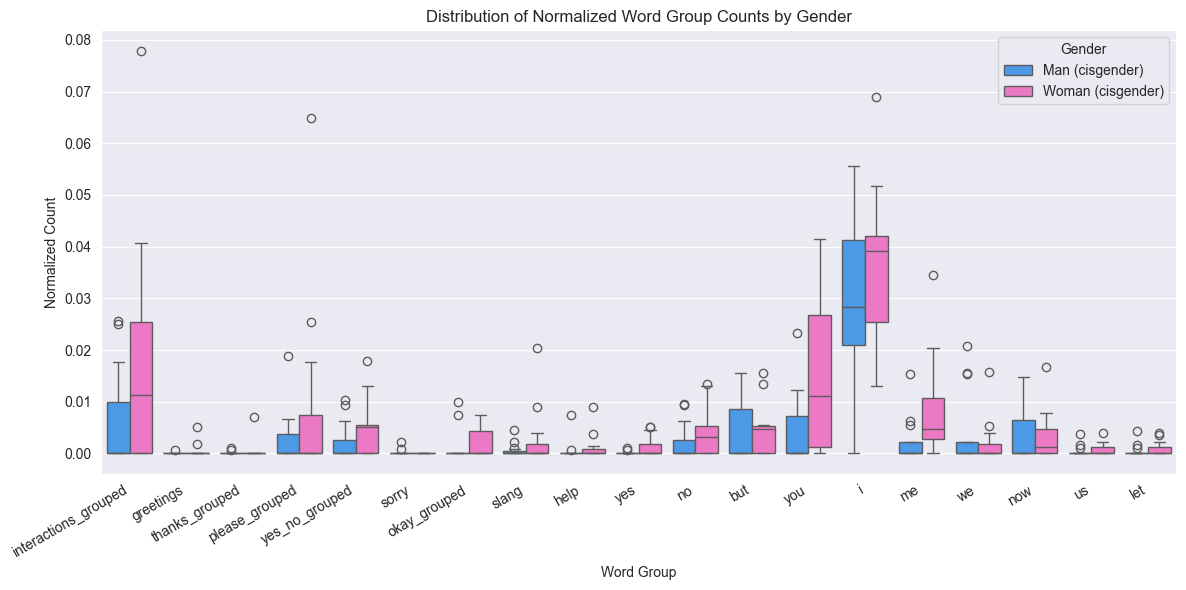

interactions_grouped:
  T-statistic: -1.7208, p-value: 0.1050
  Female: n=13, variance=0.0005
  Male:   n=15, variance=0.0001
greetings:
  T-statistic: -1.1789, p-value: 0.2606
  Female: n=13, variance=0.0000
  Male:   n=15, variance=0.0000
thanks_grouped:
  T-statistic: -0.7662, p-value: 0.4577
  Female: n=13, variance=0.0000
  Male:   n=15, variance=0.0000
please_grouped:
  T-statistic: -1.3212, p-value: 0.2083
  Female: n=13, variance=0.0003
  Male:   n=15, variance=0.0000
yes_no_grouped:
  T-statistic: -1.5863, p-value: 0.1288
  Female: n=13, variance=0.0000
  Male:   n=15, variance=0.0000
sorry:
  T-statistic: 1.3128, p-value: 0.2104
  Female: n=13, variance=0.0000
  Male:   n=15, variance=0.0000
okay_grouped:
  T-statistic: -0.8015, p-value: 0.4301
  Female: n=13, variance=0.0000
  Male:   n=15, variance=0.0000
slang:
  T-statistic: -1.3066, p-value: 0.2141
  Female: n=13, variance=0.0000
  Male:   n=15, variance=0.0000
help:
  T-statistic: -0.7016, p-value: 0.4903
  Female: n=13

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

filtered_prompts = user_prompts[user_prompts['gender'].isin(['Man (cisgender)', 'Woman (cisgender)'])]

columns = [
    'interactions_grouped',
    'greetings',
    'thanks_grouped',
    'please_grouped',
    'yes_no_grouped',
    'sorry',
    'okay_grouped',
    'slang',
    'help',
    'yes',
    'no',
    'but',
    'you',
    'i',
    'me',
    'we',
    'now',
    'us',
    'let'
]

df_long = filtered_prompts.melt(
    id_vars=['gender'],
    value_vars=columns,
    var_name='word_group',
    value_name='normalized_count'
)

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_long,
    x='word_group',
    y='normalized_count',
    hue='gender',
    palette=['#3399FF', '#FF66CC']
)
plt.title('Distribution of Normalized Word Group Counts by Gender')
plt.ylabel('Normalized Count')
plt.xlabel('Word Group')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.legend(title='Gender')
plt.show()

from helpers.stats import run_t_test_on_gender

for col in columns:
    run_t_test_on_gender(filtered_prompts, col)



## Compare genders (excluding zeros)
excluding zeros: “among people who ever use this word, do they use it differently?”

/var/folders/w6/f5trsq6n2jx87f1mqgd_4vv80000gn/T/ipykernel_10079/2042067304.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_prompts[columns] = filtered_prompts[columns].replace(0, np.nan)


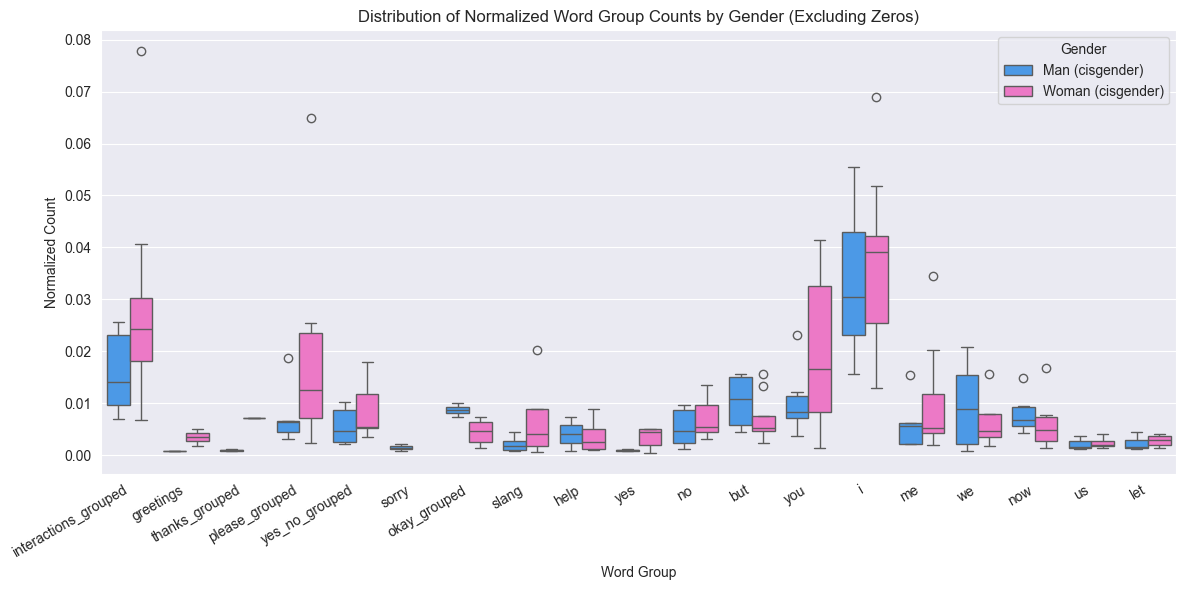

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


interactions_grouped:
  T-statistic: -1.5388, p-value: 0.1571
  Female: n=8, variance=0.0005
  Male:   n=6, variance=0.0001
greetings:
  T-statistic: nan, p-value: nan
  Female: n=2, variance=0.0000
  Male:   n=1, variance=nan
thanks_grouped:
  T-statistic: nan, p-value: nan
  Female: n=1, variance=nan
  Male:   n=2, variance=0.0000
please_grouped:
  T-statistic: -1.3110, p-value: 0.2389
  Female: n=6, variance=0.0005
  Male:   n=5, variance=0.0000
yes_no_grouped:
  T-statistic: -1.1981, p-value: 0.2540
  Female: n=8, variance=0.0000
  Male:   n=6, variance=0.0000
sorry:
  T-statistic: nan, p-value: nan
  Female: n=0, variance=nan
  Male:   n=2, variance=0.0000
okay_grouped:
  T-statistic: 2.5278, p-value: 0.1084
  Female: n=6, variance=0.0000
  Male:   n=2, variance=0.0000
slang:
  T-statistic: -1.3521, p-value: 0.2412
  Female: n=5, variance=0.0001
  Male:   n=4, variance=0.0000
help:
  T-statistic: 0.0875, p-value: 0.9397
  Female: n=4, variance=0.0000
  Male:   n=2, variance=0.0000

In [28]:
# Replace zeros with NaN in the selected columns
filtered_prompts[columns] = filtered_prompts[columns].replace(0, np.nan)

# Reshape to long format as before
df_long = filtered_prompts.melt(
    id_vars=['gender'],
    value_vars=columns,
    var_name='word_group',
    value_name='normalized_count'
)

# Plot (zeros are now NaN and will be ignored)
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_long,
    x='word_group',
    y='normalized_count',
    hue='gender',
    palette=['#3399FF', '#FF66CC']
)
plt.title('Distribution of Normalized Word Group Counts by Gender (Excluding Zeros)')
plt.ylabel('Normalized Count')
plt.xlabel('Word Group')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.legend(title='Gender')
plt.show()

for col in columns:
    run_t_test_on_gender(filtered_prompts, col)



## Compare Age Groups

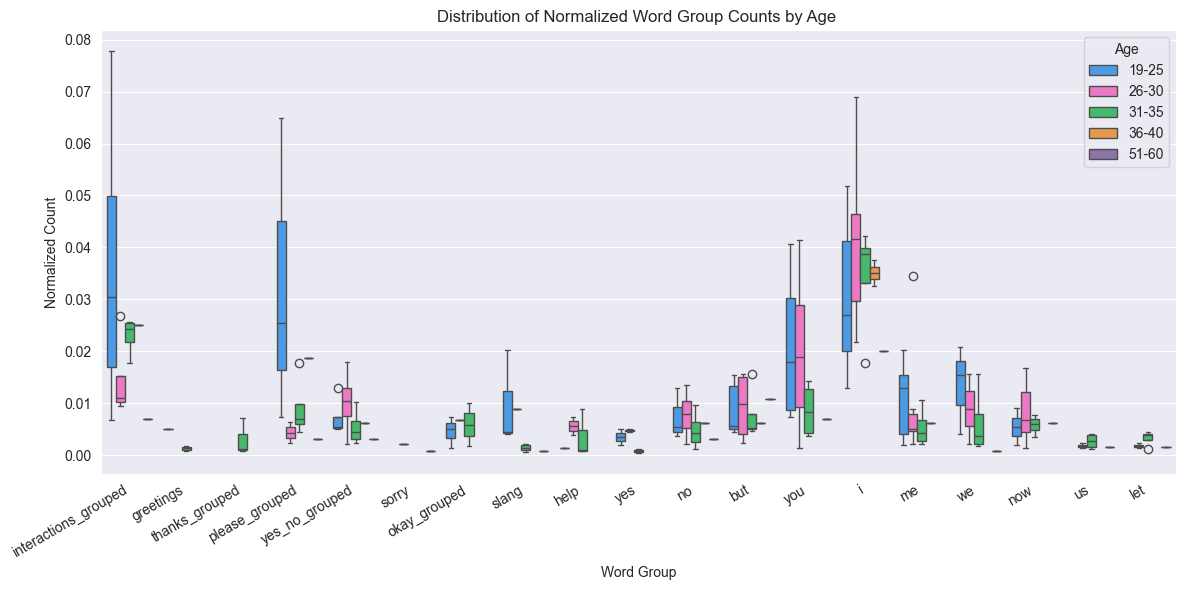

In [29]:
df_long = filtered_prompts.melt(
    id_vars=['age'],
    value_vars=columns,
    var_name='word_group',
    value_name='normalized_count'
)

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_long,
    x='word_group',
    y='normalized_count',
    hue='age',
    palette=['#3399FF', '#FF66CC', '#33CC66', '#FF9933', '#8C6BB1']
)
plt.title('Distribution of Normalized Word Group Counts by Age ')
plt.ylabel('Normalized Count')
plt.xlabel('Word Group')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.legend(title='Age')
plt.show()